In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as warnings
warnings.filterwarnings('ignore')

### Importing the data

In [11]:
df=pd.read_csv("rating_short.csv")

### Data analysis

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78245 entries, 0 to 78244
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userid     78245 non-null  object 
 1   productid  78245 non-null  object 
 2   rating     78245 non-null  float64
 3   date       78245 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 2.4+ MB


In [14]:
df.duplicated().sum()

0

In [15]:
df.isnull().sum()

userid       0
productid    0
rating       0
date         0
dtype: int64

In [16]:
df.describe()

,rating,date
count,78245.000000,7.824500e+04
mean,4.006454,1.338128e+09
std,1.385342,6.891994e+07
min,1.000000,9.320832e+08
25%,3.000000,1.315008e+09
50%,5.000000,1.360800e+09
75%,5.000000,1.386029e+09
max,5.000000,1.406074e+09


In [17]:
# rating levels
Levels=sorted(df.rating.unique())
Levels

[1.0, 2.0, 3.0, 4.0, 5.0]

In [18]:
# No.of customers in the data
df.userid.nunique()

76430

In [19]:
# No. of products in the data
df.productid.nunique()

40228

In [20]:
# mostfrequently rated product
print(df.productid.value_counts().idxmax())
print(df.productid.value_counts().max())

B0074BW614
201


In [21]:
# most frequently rating customer 
print(df.userid.value_counts().idxmax())
print(df.userid.value_counts().max())

A3LGT6UZL99IW1
8


In [22]:
# total purchase per customer
total_purchase_per_customer=df.groupby('userid')['productid'].count().sort_values(ascending=False)
total_purchase_per_customer

userid
A1ODOGXEYECQQ8    8
A3LGT6UZL99IW1    8
ADLVFFE4VBT8      7
ARBKYIVNYWK3C     7
AVPNQUVZWMDSX     6
                 ..
A29MJ8QKQIQHMW    1
A29MITUY30D61W    1
A29MIS41KQ21E8    1
A29MI1DJR2JYU2    1
AZZYYC8OX8ELM     1
Name: productid, Length: 76430, dtype: int64

In [23]:
# rating reflecting overall performance
df.rating.value_counts()

rating
5.0    43360
4.0    14878
1.0     9128
3.0     6287
2.0     4592
Name: count, dtype: int64

In [24]:
# average rating per customer
Av_user_rating=df.groupby('userid')['rating'].mean()
Av_user_rating

userid
A000063614T1OE0BUSKUT    5.0
A0009478CBXKUCALUC7U     5.0
A00101847G3FJTWYGNQA     5.0
A00229361XSNMXZ0NHCP0    3.0
A00261423251DFHHYVST9    5.0
                        ... 
AZZXSM5W248P8            4.0
AZZXYB7CMAC6Z            5.0
AZZY7T62AF17E            5.0
AZZYW4YOE1B6E            5.0
AZZYYC8OX8ELM            5.0
Name: rating, Length: 76430, dtype: float64

### Correcting datatype

In [26]:
df.columns

Index(['userid', 'productid', 'rating', 'date'], dtype='object')

In [27]:
df["date"]=pd.to_datetime(df.date,unit="s")
df["rating"]=df.rating.astype("int8")

In [28]:
# timeline of data
print(df.date.min())
print(df.date.max())

1999-07-16 00:00:00
2014-07-23 00:00:00


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78245 entries, 0 to 78244
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   userid     78245 non-null  object        
 1   productid  78245 non-null  object        
 2   rating     78245 non-null  int8          
 3   date       78245 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int8(1), object(2)
memory usage: 1.9+ MB


### Visual analysis

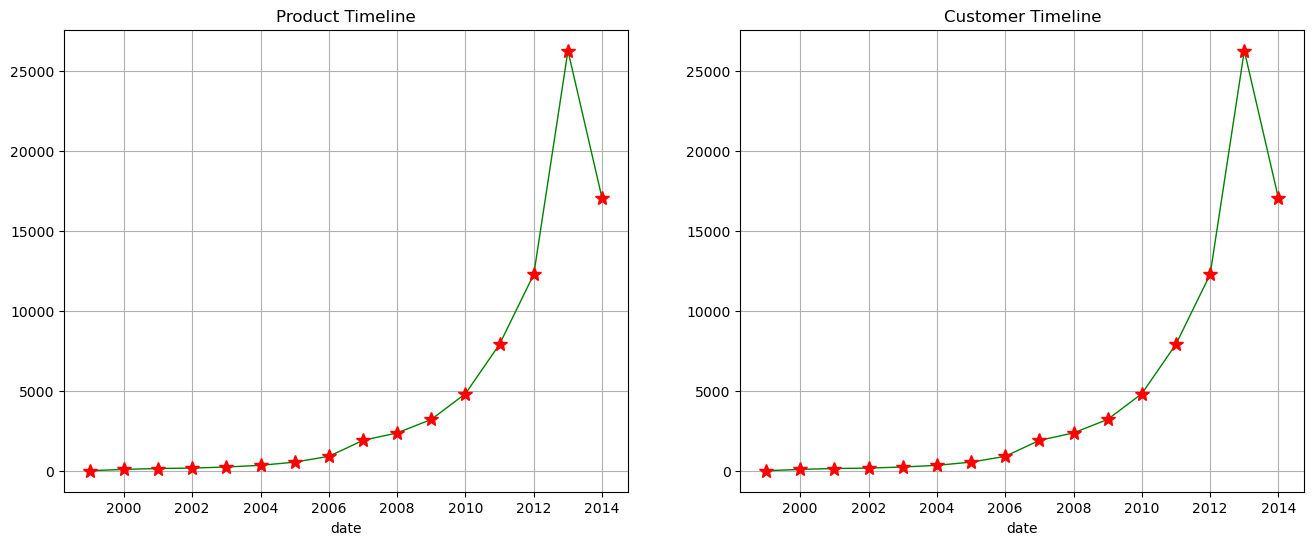

In [31]:
plt.figure(figsize=(16,6))
plt.tight_layout()

plt.subplot(1,2,1)
plt.ticklabel_format(style="plain",axis="y")
df.groupby(df['date'].dt.year)['productid'].count().plot(color="green",linewidth=1.0,marker='*',
                                                   markeredgecolor="red",markerfacecolor="red",markersize=10)
plt.grid(True)
plt.title ("Product Timeline")

plt.subplot(1,2,2)
plt.ticklabel_format(style="plain",axis="y")
df.groupby(df['date'].dt.year)['userid'].count().plot(color="green",linewidth=1.0,marker='*',
                                                 markeredgecolor="red",markerfacecolor="red",markersize=10)
plt.grid(True)
plt.title ("Customer Timeline")

plt.show()

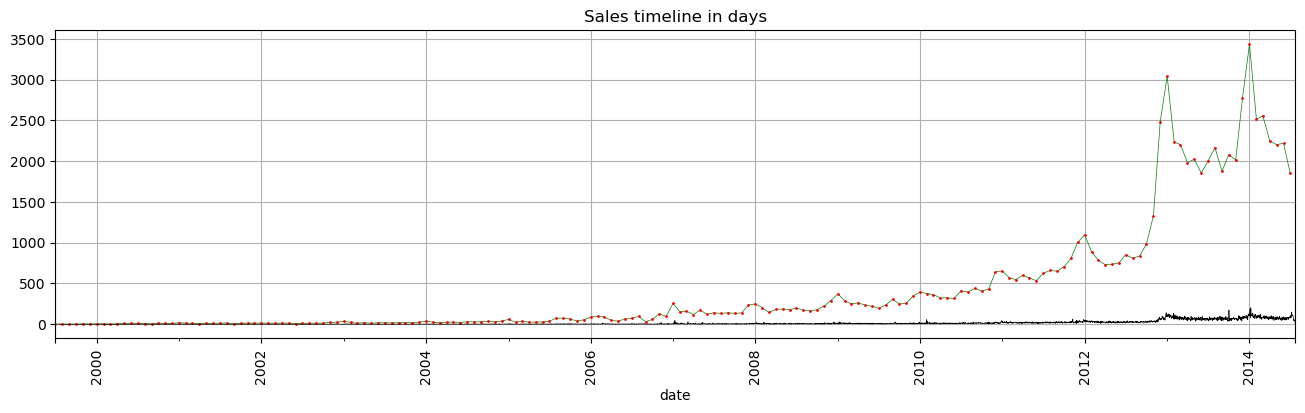

In [32]:
plt.figure(figsize=(16,4))
plt.tight_layout()
plt.ticklabel_format(style="plain",axis="y")


df.groupby(pd.Grouper(key='date',freq='M'))['productid'].count().plot(color="green",linewidth=0.5,
                                            marker='.',markersize=2.0,markerfacecolor='red',markeredgecolor='red',rot=90)
plt.grid(True)
plt.title ("Sales Timeline in months")



df.groupby(pd.Grouper(key='date',freq='D'))['productid'].count().plot(color="black",linewidth=0.5,rot=90)
plt.grid(True)
plt.title("Sales timeline in days")


plt.show()

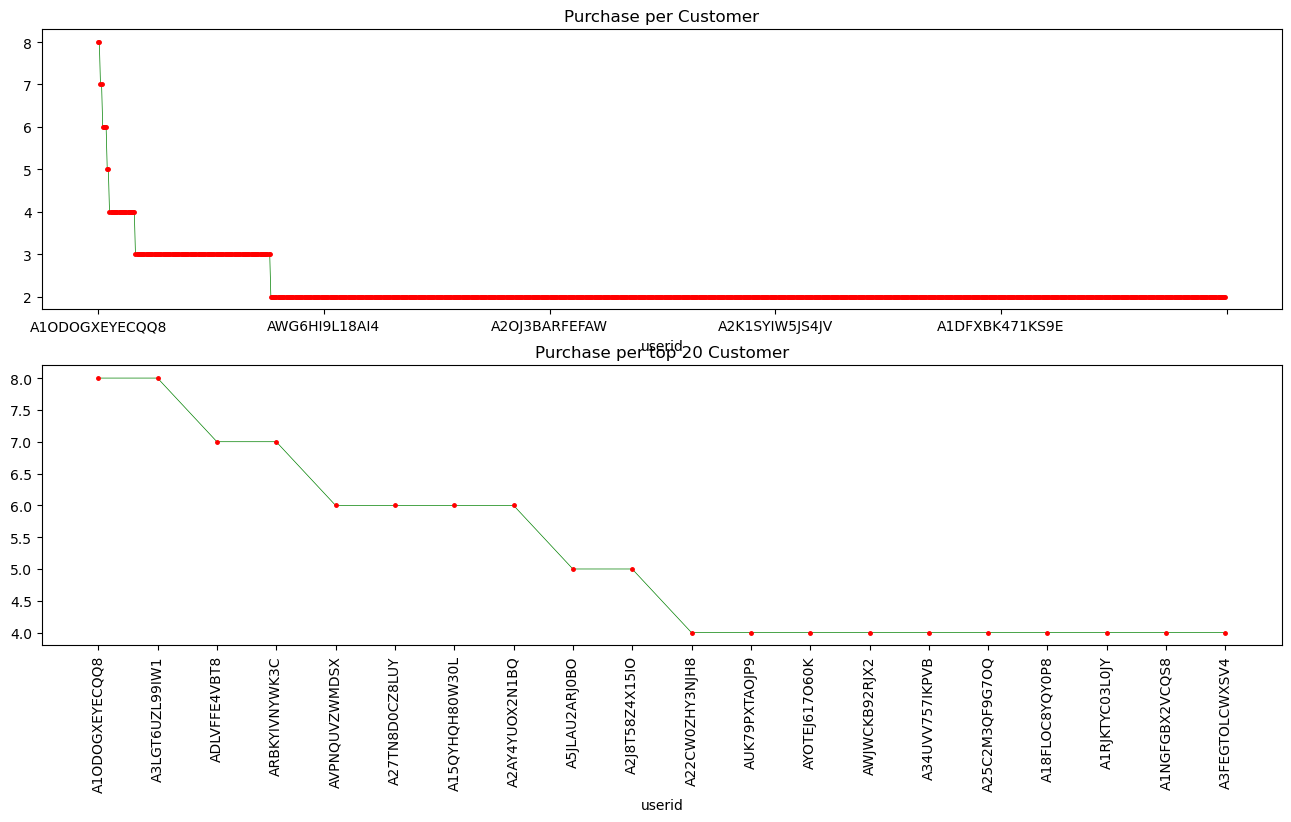

In [33]:
plt.figure(figsize=(16,8))
plt.tight_layout()

plt.subplot(2,1,1)
total_purchase_per_customer.head(1000).plot(color="green",linewidth=0.5,
                                            marker='.',markersize=5.0,markerfacecolor='red',markeredgecolor='red')
plt.title ("Purchase per Customer")

plt.subplot(2,1,2)
ax=total_purchase_per_customer.head(20).plot(color="green",linewidth=0.5,
                                            marker='.',markersize=5.0,markerfacecolor='red',markeredgecolor='red',rot=90)
ax.set_xticks(range(20))
ax.set_xticklabels(total_purchase_per_customer.head(20).index,rotation=90)
plt.title ("Purchase per top 20 Customer")


plt.show()

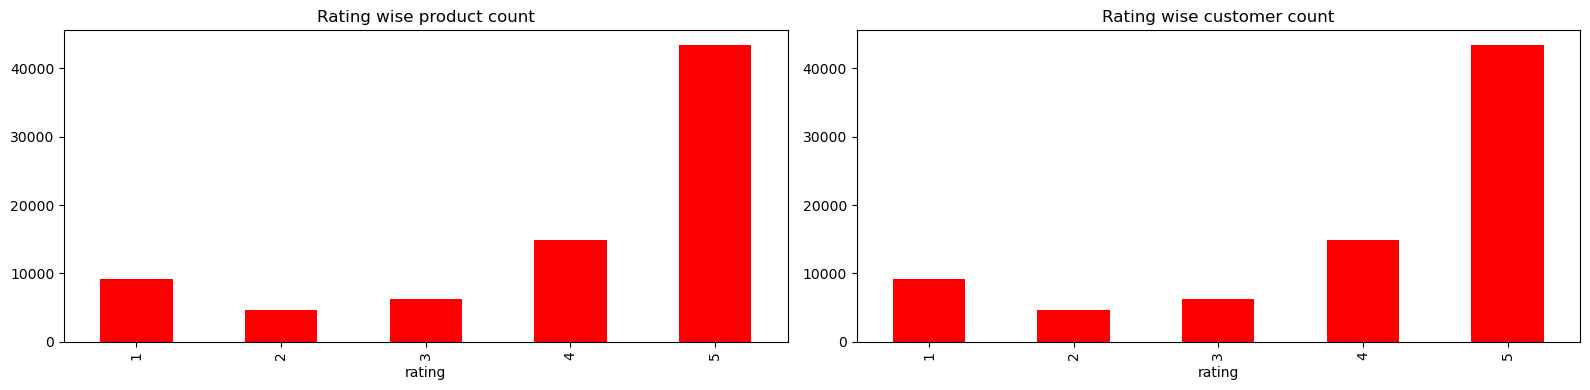

In [34]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.ticklabel_format(style="plain",axis="y")
df.productid.groupby(df["rating"]).count().plot(kind="bar",color="red")
plt.title("Rating wise product count")

plt.subplot(1,2,2)
plt.ticklabel_format(style="plain",axis="y")
df.userid.groupby(df["rating"]).count().plot(kind="bar",color="red")
plt.title("Rating wise customer count")

plt.tight_layout()
plt.show()

Rating distribution Curve Skew =  -1.1971115566660435


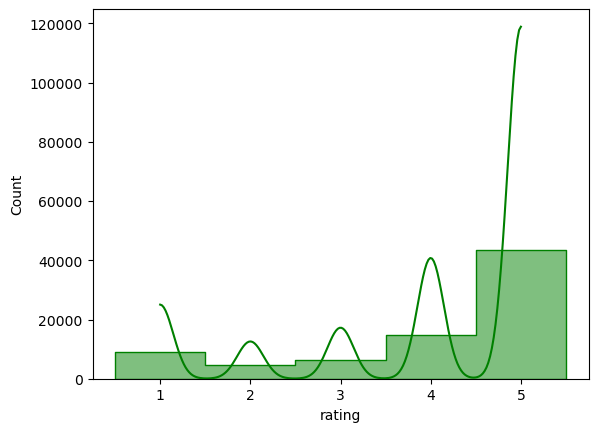

In [35]:
sns.histplot(df.rating,bins=5,discrete=True,kde=True,color="Green",binwidth=0.5,element='step')
plt.ticklabel_format(style="plain",axis="y")
# Its not a normal distribution , extreme left skew
print("Rating distribution Curve Skew = ",df.rating.skew())
# sns.countplot(x=rat.rating)

1st Quartile 3.0
3rd Quartile 5.0
Inter Quartile Range 2.0


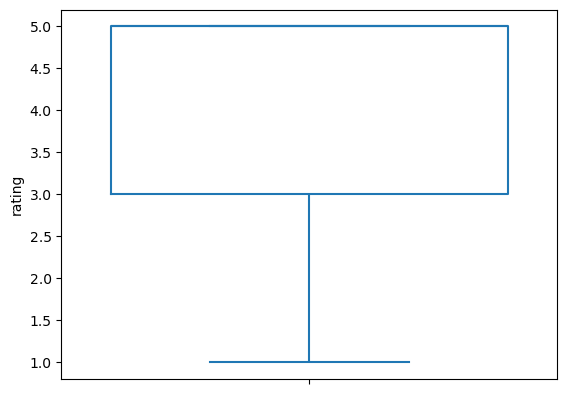

In [36]:
sns.boxplot(df.rating,fill=False)
Q1=np.percentile(df.rating,25)
Q3=np.percentile(df.rating,75)
IQR=Q3-Q1
print('1st Quartile',Q1)
print('3rd Quartile',Q3)
print('Inter Quartile Range',IQR)


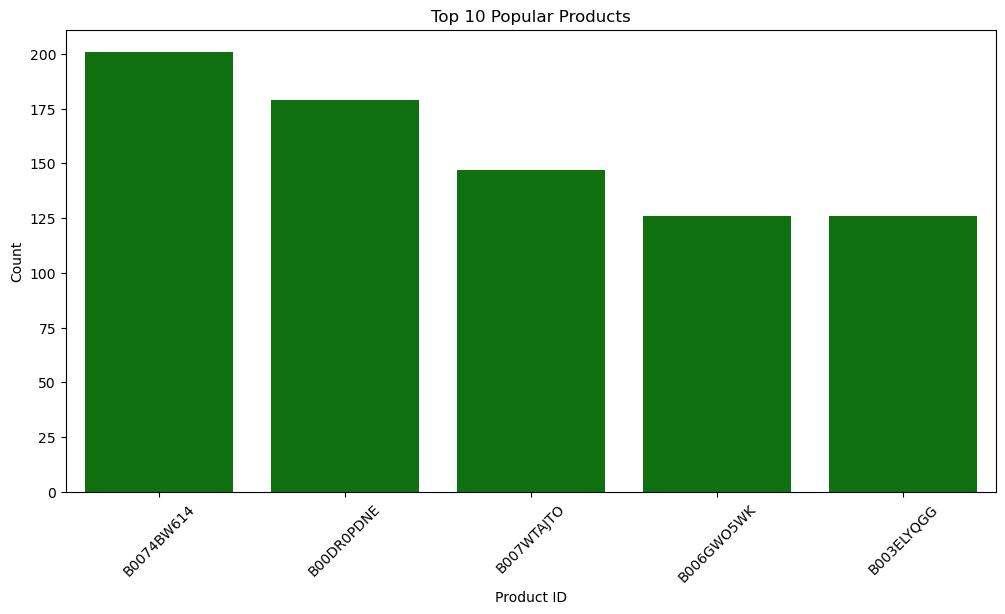

In [37]:
# Top recommended products
popular_products = df['productid'].value_counts().head(5)
plt.figure(figsize=(12, 6))
sns.barplot(x=popular_products.index, y=popular_products.values,color="green")
plt.title("Top 10 Popular Products")
plt.xlabel("Product ID")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
LE_uid=LabelEncoder()
LE_pid=LabelEncoder()
df["userid"]=LE_uid.fit_transform(df.userid)
df["productid"]=LE_pid.fit_transform(df.productid)
df

,userid,productid,rating,date
0,19800,6501,5,2008-01-08
1,68377,14346,4,2012-03-10
2,3273,29591,5,2013-01-20
3,22312,31598,1,2013-11-25
4,57219,27361,5,2014-06-17
...,...,...,...,...
78240,16932,16243,5,2012-09-11
78241,69246,22851,4,2013-05-03
78242,8768,14414,2,2013-08-01
78243,38853,22565,5,2014-02-19


### KMean Model

In [41]:
data=df.drop('date',axis=1).sample(frac=0.1,random_state=42)

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
SS=StandardScaler()

In [44]:
dfs=SS.fit_transform (data)

In [45]:
from sklearn.decomposition import PCA

In [46]:
pca=PCA(n_components=0.75,random_state=42)

In [47]:
dfp=pca.fit_transform(dfs)

In [48]:
dfp=pd.DataFrame(dfp)

In [49]:
var=pca.explained_variance_ratio_
var

array([0.34752629, 0.33406001, 0.3184137 ])

In [50]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [51]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit_predict(dfp)
    wcss.append(kmeans.inertia_)

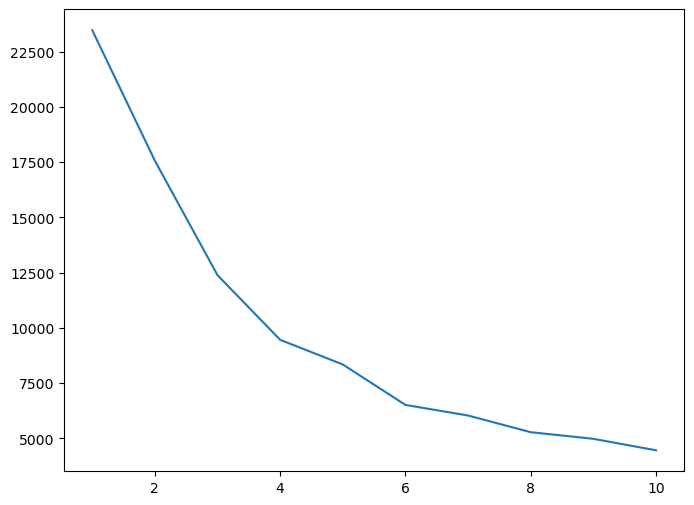

In [52]:
plt.figure(figsize=(8,6))
plt.plot(range(1,11),wcss)

In [53]:
for n in range(2,11): 
    kmeans=KMeans(n_clusters=n,random_state=4)
    ss=silhouette_score(dfp,kmeans.fit_predict(dfp))
    print("no of clusters=",n,ss)

no of clusters= 2 0.2535080164685105
no of clusters= 3 0.25399748512739745
no of clusters= 4 0.3126950404216653
no of clusters= 5 0.32553410772239716
no of clusters= 6 0.3279388004603181
no of clusters= 7 0.2989009363730806
no of clusters= 8 0.2833724781497936
no of clusters= 9 0.29365398440014207
no of clusters= 10 0.2842764054924719


In [54]:
KM=KMeans(n_clusters=6,random_state=4)
KM.fit(dfp)

KMeans(n_clusters=6, random_state=4)

In [55]:
silhouette_score_kmean=silhouette_score(dfp,kmeans.predict(dfp))

<Axes: xlabel='0', ylabel='1'>

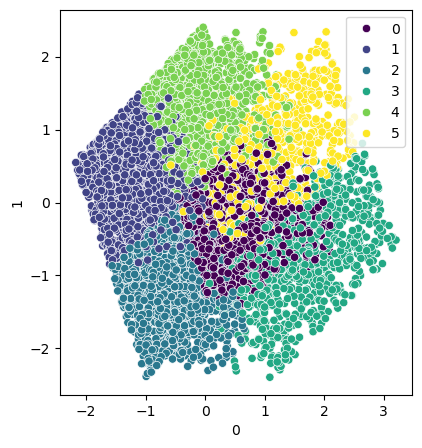

In [56]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.scatterplot(x=dfp[0],y=dfp[1],hue=KM.predict(dfp),palette='viridis')

In [57]:
# aim : Building  3 diffrent models to predict rating and product recommendation

### Time Series

In [59]:
# 2 features selected for preparing a time series model
rat=df[["date","rating"]]

In [60]:
# resetting the index
rat.set_index(rat.columns[0],inplace=True)

In [61]:
# upsampling done for daywise average rating
rat=rat.resample("D").mean()

In [62]:
rat=rat.fillna(rat.rating.mean())

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

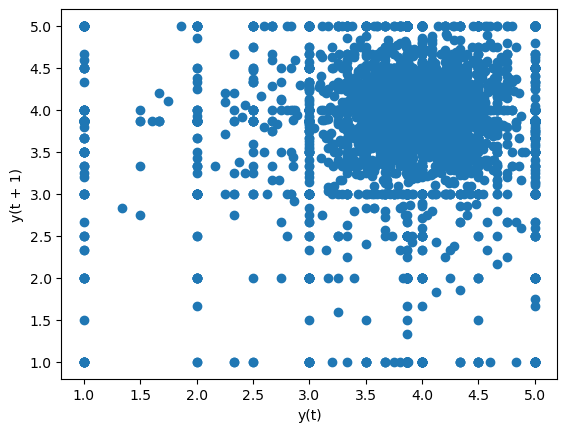

In [63]:
from pandas.plotting import lag_plot
lag_plot(rat,lag=1)
# poor autocorrelation

***Acf_plot*** for q_value

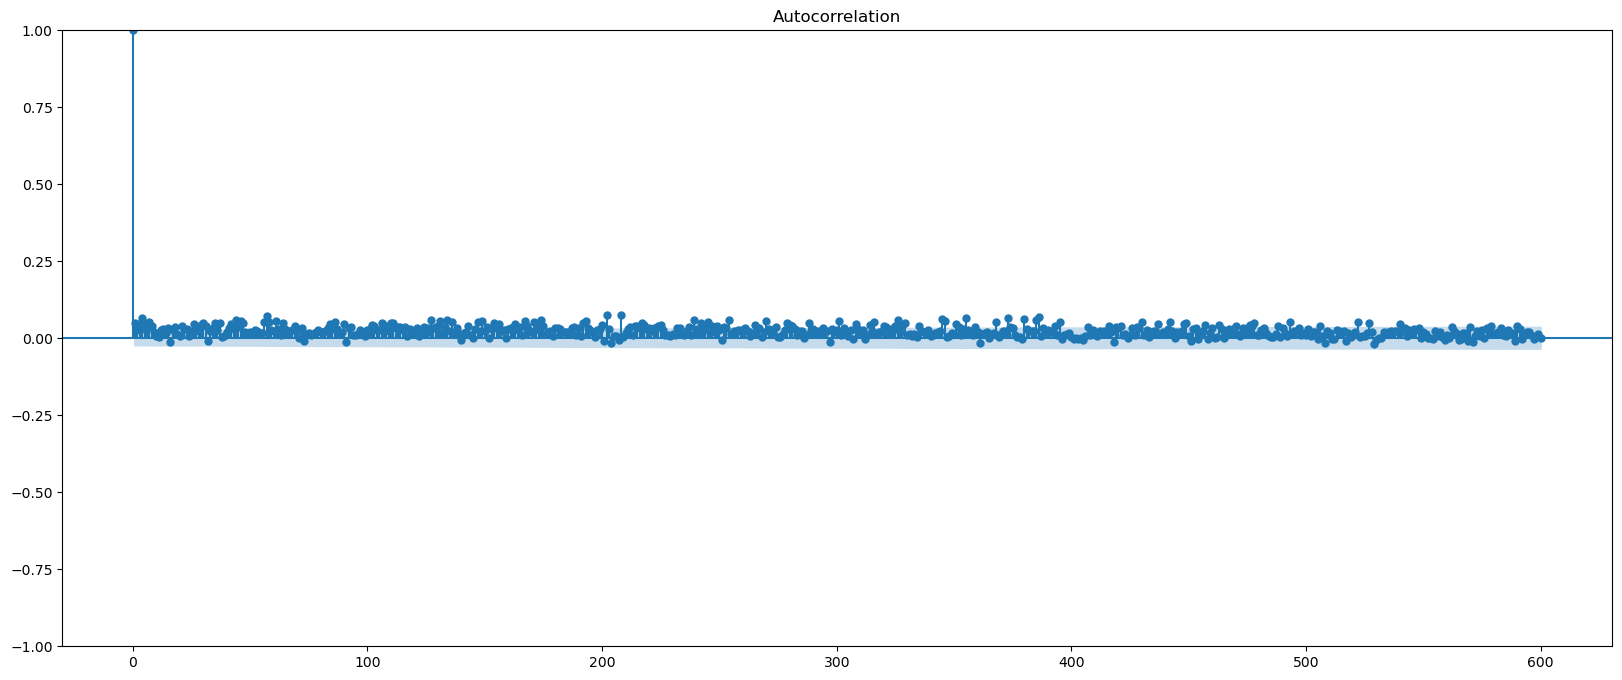

In [65]:
from statsmodels.graphics.tsaplots import plot_acf
fig,ax=plt.subplots(figsize=(20,8))
plot_acf(rat.rating,lags=600,ax=ax);
# indicates q=420 which does not correlate with the lag plot findings

<Axes: xlabel='y(t)', ylabel='y(t + 420)'>

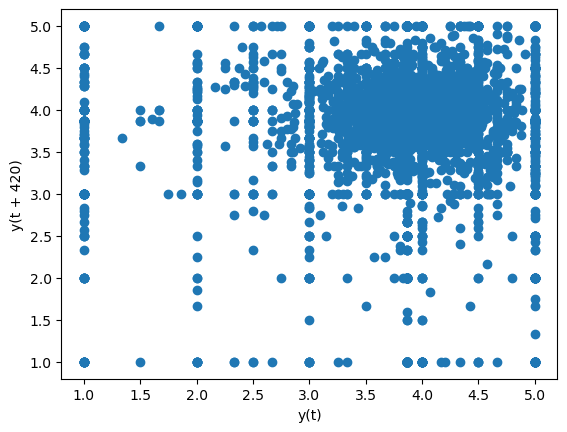

In [66]:
lag_plot(rat,lag=420)
# no improvement in autocorrelation,so lets accept q=1 to save computation

***Pacf_plot*** for p_value

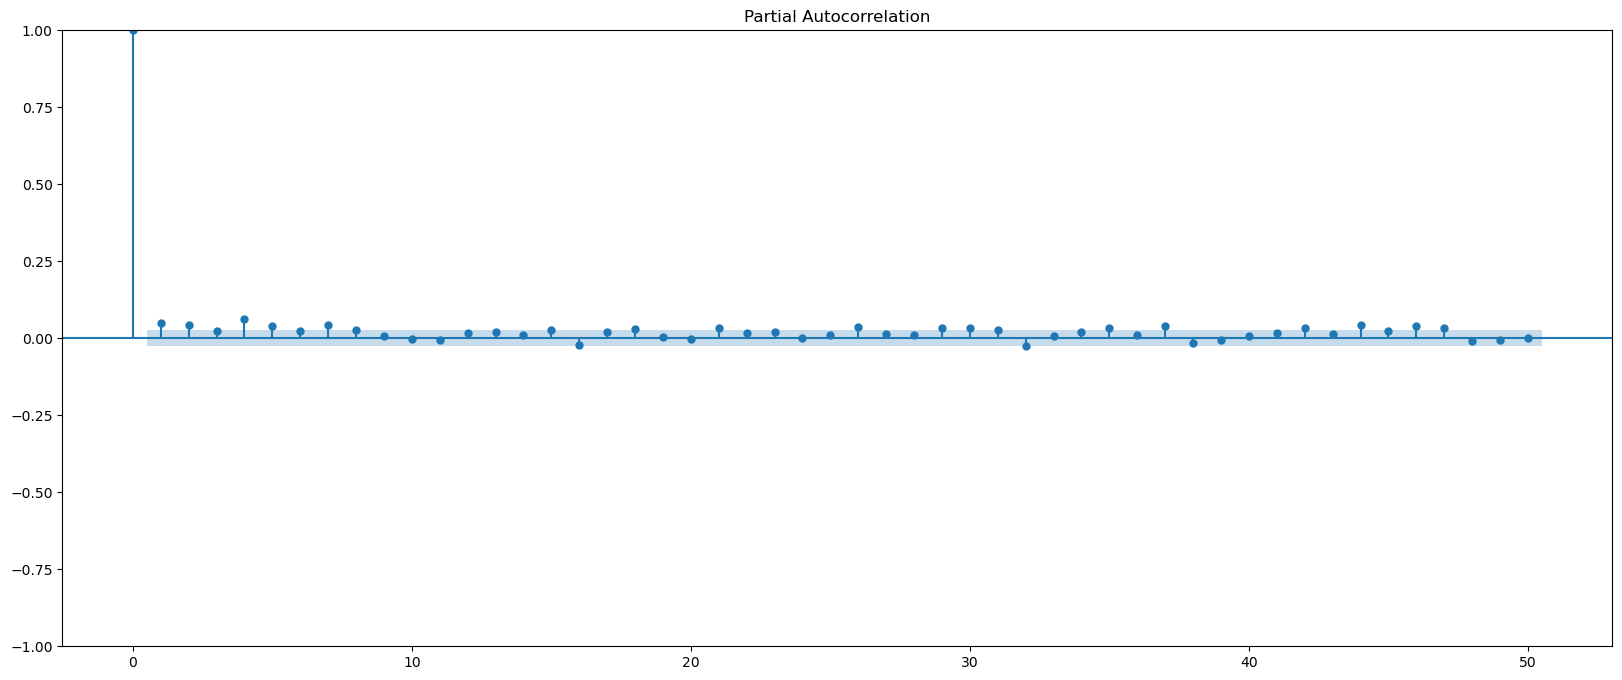

In [68]:
from statsmodels.graphics.tsaplots import plot_pacf
fig,ax=plt.subplots(figsize=(20,8))
plot_pacf(rat.rating,lags=50,ax=ax);
# means p=20

***Ad_Fuller*** for d_value

In [70]:
# lets check for thestationarity using ADF
from statsmodels.tsa.stattools import adfuller
df_test=adfuller(rat)
ad_output=pd.Series(df_test[0:4],index=['Test Statistics','p_value','Lags used','No of obs used'])
for i,j in df_test[4].items():
    ad_output['Critical Values (%s)'%i]=j
print(ad_output)

Test Statistics         -9.746007e+00
p_value                  8.252673e-17
Lags used                3.100000e+01
No of obs used           5.455000e+03
Critical Values (1%)    -3.431549e+00
Critical Values (5%)    -2.862070e+00
Critical Values (10%)   -2.567052e+00
dtype: float64


In [71]:
# because p value is <0.05,data is stationary
# indicates d=0

In [72]:
X=rat
train_size = int(len(X) * 0.50)
train,test = X[:train_size], X[train_size:]

In [73]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [74]:
# function to calculate square root of mean_squarred error
def A_rmse(X,pdq):    
    train_size = int(len(X) * 0.50)
    train, test = X[:train_size], X[train_size:]
    A  = ARIMA(train, order=pdq)
    model=A.fit()
    ypred= model.forecast(steps=len(test))        
    rmse =np.sqrt(mean_squared_error(test, ypred)) 
    return rmse

A_rmse(X,(20,0,1))

0.5103003953539298

In [75]:
# designing a function to find the best model
def best_model(df, p_values, d_values, q_values):
    X=data.values.astype('float32')
    best_score, best_cfg = float('inf'), None 
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = A_rmse(X, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [76]:
# evaluate combinations of p, d and q values for an ARIMA model
p_values = range(0,2)
d_values = range(0,1)
q_values = range(0,2)
data=rat.rating
best_model(data,p_values,d_values,q_values)

ARIMA(0, 0, 0) RMSE=0.510
ARIMA(0, 0, 1) RMSE=0.510
ARIMA(1, 0, 0) RMSE=0.510
ARIMA(1, 0, 1) RMSE=0.532
Best ARIMA(1, 0, 0) RMSE=0.510


In [77]:
# So the best Model is
A = ARIMA(train,order=(1,0,0))
ARI=A.fit()
ypred=ARI.forecast(steps=len(test))
yforecast=ARI.forecast(steps=len(test))
rmse =np.sqrt(mean_squared_error(test, ypred)) 
rmse

0.5103735488956528

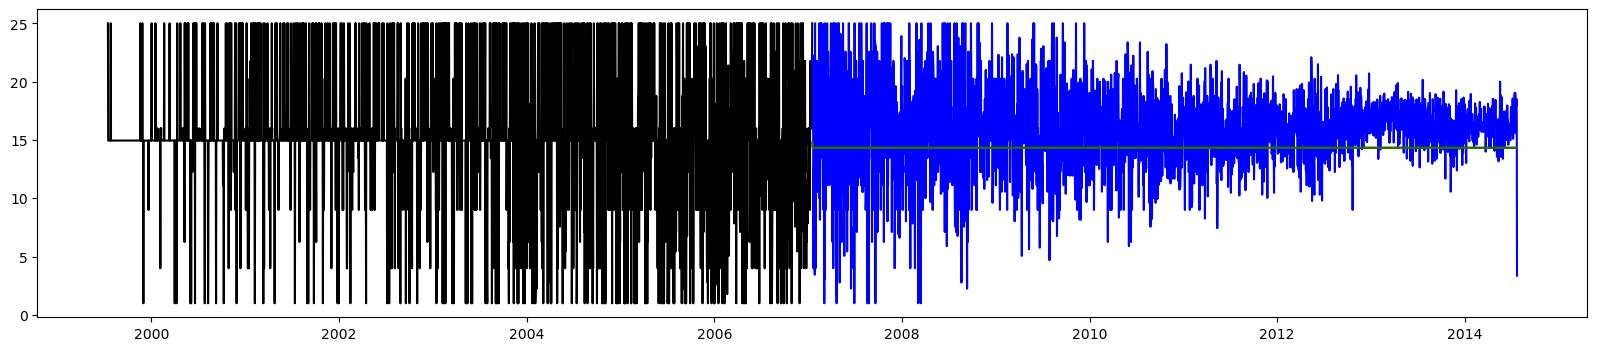

In [78]:
plt.figure(figsize=(20,4))
plt.plot(train**2,color='black')
plt.plot(test**2,color='blue')
plt.plot(ypred**2,color='red')
plt.plot(yforecast**2,color='green')

### LightGB models

In [80]:
df

,userid,productid,rating,date
0,19800,6501,5,2008-01-08
1,68377,14346,4,2012-03-10
2,3273,29591,5,2013-01-20
3,22312,31598,1,2013-11-25
4,57219,27361,5,2014-06-17
...,...,...,...,...
78240,16932,16243,5,2012-09-11
78241,69246,22851,4,2013-05-03
78242,8768,14414,2,2013-08-01
78243,38853,22565,5,2014-02-19


In [81]:
df=df.drop("date",axis=1)

In [82]:
df

,userid,productid,rating
0,19800,6501,5
1,68377,14346,4
2,3273,29591,5
3,22312,31598,1
4,57219,27361,5
...,...,...,...
78240,16932,16243,5
78241,69246,22851,4
78242,8768,14414,2
78243,38853,22565,5


In [83]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,accuracy_score

In [84]:
X=df.drop("rating",axis=1)
y=df.rating
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

pip install lightgbm

In [86]:
from lightgbm import LGBMClassifier

In [87]:
LG1=LGBMClassifier(n_estimators=10,learning_rate=0.01,random_state=42)

In [88]:
LG1.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001365 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 62596, number of used features: 2
[LightGBM] [Info] Start training from score -2.148553
[LightGBM] [Info] Start training from score -2.835420
[LightGBM] [Info] Start training from score -2.521281
[LightGBM] [Info] Start training from score -1.659995
[LightGBM] [Info] Start training from score -0.590308


LGBMClassifier(learning_rate=0.01, n_estimators=10, random_state=42)

In [89]:
y_pred=LG1.predict(X_test)
accuracy_score(y_test,y_pred)

0.5541568151319574

In [90]:
LG2=LGBMClassifier()

In [91]:
p={'n_estimators':[25,50,100],'learning_rate':[0.01,0.1]}
GS=GridSearchCV(LG2,p,cv=3)
GS.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000685 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 41730, number of used features: 2
[LightGBM] [Info] Start training from score -2.148537
[LightGBM] [Info] Start training from score -2.835541
[LightGBM] [Info] Start training from score -2.521365
[LightGBM] [Info] Start training from score -1.659937
[LightGBM] [Info] Start training from score -0.590306
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000659 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 41731, number of used features: 2
[LightGBM] [Info] Start training from score -2.148561
[LightGBM] [Info] Start training from score -2.835564
[LightGBM] [Info] Start training from score -2.5

GridSearchCV(cv=3, estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.01, 0.1],
                         'n_estimators': [25, 50, 100]})

In [92]:
GS.best_params_

{'learning_rate': 0.01, 'n_estimators': 25}

In [93]:
LG=LGBMClassifier(n_estimators=25,learning_rate=0.01,random_state=42)

In [94]:
LG.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001016 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 62596, number of used features: 2
[LightGBM] [Info] Start training from score -2.148553
[LightGBM] [Info] Start training from score -2.835420
[LightGBM] [Info] Start training from score -2.521281
[LightGBM] [Info] Start training from score -1.659995
[LightGBM] [Info] Start training from score -0.590308


LGBMClassifier(learning_rate=0.01, n_estimators=25, random_state=42)

In [95]:
y_pred=LG.predict(X_test)
accuracy_score(y_test,y_pred)

0.5541568151319574

### dumping the models

In [97]:
import pickle as pickle

In [98]:
with open('ARI.pkl','wb') as f:
    pickle.dump(ARI,f)

In [99]:
with open('ARI.pkl','rb') as f:
    ARI=pickle.load(f)

In [100]:
with open('LG.pkl','wb') as f:
    pickle.dump(LG,f) 

In [101]:
with open('LG.pkl','rb') as f:
    LG=pickle.load(f)